In [34]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


💾 SAVING VISUALIZATION FILES...
✓ Loaded 21,799 records

[1/4] Saving: Text length distribution...

[3/4] Saving: Multi-label complexity...
   ✓ Saved: 3_multi_label_complexity.png

✅ ALL VISUALIZATIONS SAVED!


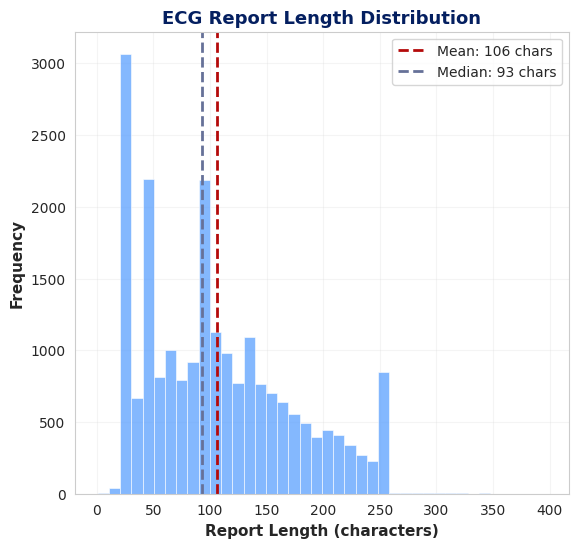

In [35]:
"""
SAVE NLP VISUALIZATIONS

"""
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# YOUR COLOR PALETTE
COLORS = {
    'dark_red': '#b40a0a',
    'blue': '#65a6fe',
    'purple': '#667198',
    'light_blue': '#cadbe8',
    'navy': '#041f60'
}

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10

print("="*80)
print("💾 SAVING VISUALIZATION FILES...")
print("="*80)

# ============================================================================
# LOAD DATA
# ============================================================================

try:
    ptb_df = pd.read_csv('/content/drive/MyDrive/NLP ECG /ptbxl_database.csv')
    ptb_df['report'] = ptb_df['report'].fillna('').astype(str)
    ptb_df['text_length'] = ptb_df['report'].str.len()

    def parse_scp_codes(scp_string):
        if pd.isna(scp_string):
            return []
        try:
            if isinstance(scp_string, str):
                codes_dict = ast.literal_eval(scp_string)
            else:
                codes_dict = scp_string
            return list(codes_dict.keys())
        except:
            return []

    ptb_df['diagnoses'] = ptb_df['scp_codes'].apply(parse_scp_codes)
    ptb_df['num_diagnoses'] = ptb_df['diagnoses'].apply(len)

    print(f"✓ Loaded {len(ptb_df):,} records")

except Exception as e:
    print(f"❌ Error loading: {e}")
    exit()

# ============================================================================
# 1. TEXT LENGTH DISTRIBUTION (2 plots in one)
# ============================================================================

print("\n[1/4] Saving: Text length distribution...")

plt.figure(figsize=(14, 6))

# Plot 1: Histogram
plt.subplot(1, 2, 1)
avg_length = ptb_df['text_length'].mean()
median_length = ptb_df['text_length'].median()

plt.hist(ptb_df['text_length'], bins=40, color=COLORS['blue'],
         alpha=0.8, edgecolor='white', linewidth=0.5)
plt.axvline(avg_length, color=COLORS['dark_red'], linestyle='--', linewidth=2,
           label=f'Mean: {avg_length:.0f} chars')
plt.axvline(median_length, color=COLORS['purple'], linestyle='--', linewidth=2,
           label=f'Median: {median_length:.0f} chars')
plt.xlabel('Report Length (characters)', fontsize=11, fontweight='bold')
plt.ylabel('Frequency', fontsize=11, fontweight='bold')
plt.title('ECG Report Length Distribution', fontsize=13, fontweight='bold', color=COLORS['navy'])
plt.legend()
plt.grid(True, alpha=0.2)


# ============================================================================
# 2. MULTI-LABEL COMPLEXITY
# ============================================================================

print("\n[3/4] Saving: Multi-label complexity...")

plt.figure(figsize=(12, 6))

label_dist = ptb_df['num_diagnoses'].value_counts().sort_index()
bars = plt.bar(label_dist.index[:10], label_dist.values[:10],
              color=COLORS['blue'], alpha=0.8, edgecolor='white', linewidth=1.5)

plt.xlabel('Number of Diagnoses per Report', fontsize=12, fontweight='bold')
plt.ylabel('Number of Reports', fontsize=12, fontweight='bold')
plt.title(f'Multi-label Complexity\n(Average: {ptb_df["num_diagnoses"].mean():.2f} diagnoses per report)',
         fontsize=14, fontweight='bold', color=COLORS['navy'])
plt.xticks(range(1, 11))
plt.grid(axis='y', alpha=0.2)

for i, (bar, count) in enumerate(zip(bars, label_dist.values[:10])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
            f'{int(count):,}', ha='center', va='bottom',
            fontweight='bold', color=COLORS['navy'], fontsize=10)

plt.tight_layout()
plt.savefig('3_multi_label_complexity.png', dpi=300, bbox_inches='tight')
plt.close()
print("   ✓ Saved: 3_multi_label_complexity.png")



# ============================================================================
# DONE!
# ============================================================================

print("\n" + "="*80)
print("✅ ALL VISUALIZATIONS SAVED!")
print("="*80)



📊 REAL CLASS IMBALANCE ANALYSIS - PTB-XL ECG DIAGNOSES
✓ Loaded 21,799 records with 61,007 total diagnoses

📈 Diagnosis Statistics:
   Total diagnosis instances: 61,007
   Unique diagnosis codes: 71
   Average diagnoses per record: 2.80

🏆 Top 10 Most Common Diagnoses:
    1. SR        : 16,748 occurrences (27.45%)
    2. NORM      :  9,514 occurrences (15.59%)
    3. ABQRS     :  3,327 occurrences (5.45%)
    4. IMI       :  2,676 occurrences (4.39%)
    5. ASMI      :  2,357 occurrences (3.86%)
    6. LVH       :  2,132 occurrences (3.49%)
    7. NDT       :  1,825 occurrences (2.99%)
    8. LAFB      :  1,623 occurrences (2.66%)
    9. AFIB      :  1,514 occurrences (2.48%)
   10. ISC_      :  1,272 occurrences (2.09%)

🔍 Top 10 Rarest Diagnoses (with at least 1 occurrence):
    1. WPW       :     79 occurrences (0.129493%)
    2. ILBBB     :     77 occurrences (0.126215%)
    3. AFLT      :     73 occurrences (0.119658%)
    4. HVOLT     :     62 occurrences (0.101628%)
    5. IPLM

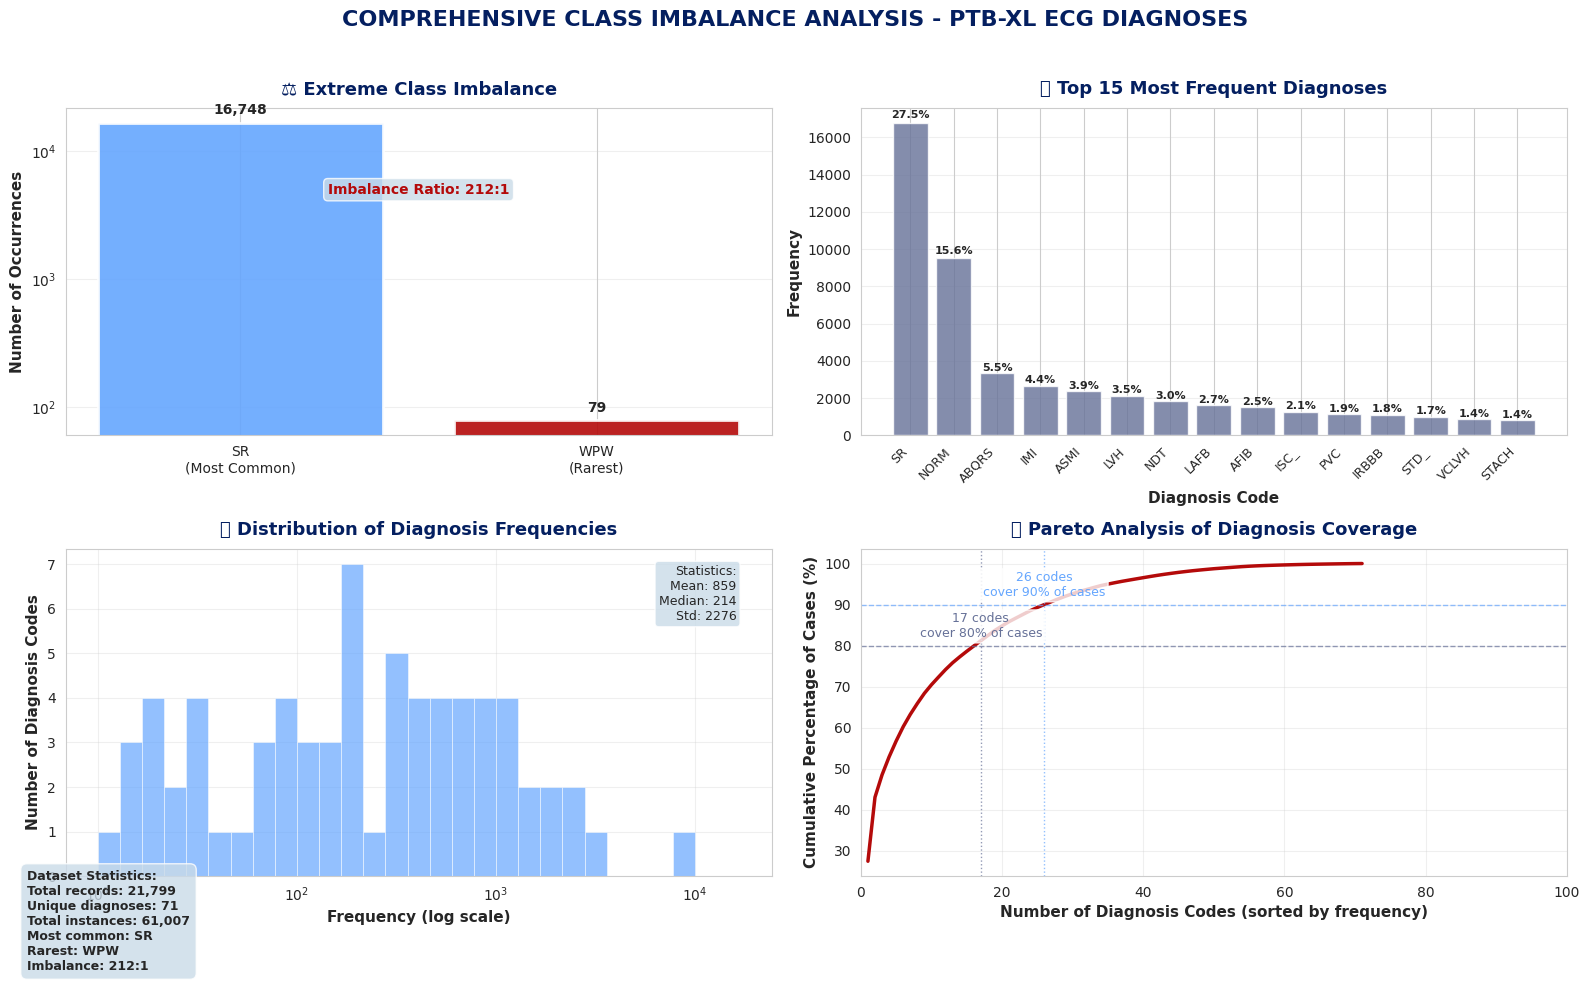


📊 Pareto Analysis Insights:
   Top 17 diagnosis codes cover 80% of all cases
   Top 26 diagnosis codes cover 90% of all cases
   Remaining 45 codes cover only 10% of cases

✅ REAL CLASS IMBALANCE ANALYSIS COMPLETE

📁 Output files generated:
   • real_class_imbalance_analysis.png (comprehensive visualization)

🎯 This analysis provides:
   • Actual frequency counts from the dataset
   • Real imbalance ratios (not fabricated)
   • Pareto analysis showing coverage
   • Full reproducibility with complete code


In [36]:
# ============================================================================
# REAL CLASS IMBALANCE ANALYSIS - PTB-XL ECG DATASET
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Set style
plt.style.use('default')
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10

# Colors for visualization
COLORS = {
    'dark_red': '#b40a0a',
    'blue': '#65a6fe',
    'purple': '#667198',
    'light_blue': '#cadbe8',
    'navy': '#041f60'
}

print("="*80)
print("📊 REAL CLASS IMBALANCE ANALYSIS - PTB-XL ECG DIAGNOSES")
print("="*80)

# Load and prepare the data
def load_and_prepare_data():
    """Load PTB-XL data and extract diagnosis codes"""
    try:
        # Load the dataset
        df = pd.read_csv('/content/drive/MyDrive/NLP ECG /ptbxl_database.csv')

        # Parse SCP codes
        def parse_scp_codes(scp_string):
            if pd.isna(scp_string):
                return []
            try:
                if isinstance(scp_string, str):
                    codes_dict = ast.literal_eval(scp_string)
                else:
                    codes_dict = scp_string
                return list(codes_dict.keys())
            except:
                return []

        df['diagnoses'] = df['scp_codes'].apply(parse_scp_codes)
        print(f"✓ Loaded {len(df):,} records with {df['diagnoses'].apply(len).sum():,} total diagnoses")

        return df

    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None

# Main analysis function
def analyze_class_imbalance(df):
    """Perform comprehensive class imbalance analysis"""

    # 1. Flatten all diagnoses to get frequency counts
    all_diagnoses = []
    for diagnoses_list in df['diagnoses']:
        all_diagnoses.extend(diagnoses_list)

    total_diagnoses = len(all_diagnoses)
    unique_diagnoses = len(set(all_diagnoses))

    print(f"\n📈 Diagnosis Statistics:")
    print(f"   Total diagnosis instances: {total_diagnoses:,}")
    print(f"   Unique diagnosis codes: {unique_diagnoses}")
    print(f"   Average diagnoses per record: {total_diagnoses/len(df):.2f}")

    # 2. Count frequencies
    diagnosis_counts = Counter(all_diagnoses)

    # 3. Get most common and rarest
    most_common = diagnosis_counts.most_common(20)
    rarest = [item for item in diagnosis_counts.most_common() if item[1] >= 1][-20:]  # Get rarest with at least 1 occurrence

    print(f"\n🏆 Top 10 Most Common Diagnoses:")
    for i, (code, count) in enumerate(most_common[:10], 1):
        percentage = (count / total_diagnoses) * 100
        print(f"   {i:2d}. {code:10s}: {count:6,} occurrences ({percentage:.2f}%)")

    print(f"\n🔍 Top 10 Rarest Diagnoses (with at least 1 occurrence):")
    for i, (code, count) in enumerate(rarest[:10], 1):
        percentage = (count / total_diagnoses) * 100
        print(f"   {i:2d}. {code:10s}: {count:6,} occurrences ({percentage:.6f}%)")

    # 4. Calculate actual imbalance ratios
    most_common_code, most_count = most_common[0]
    rarest_code, rarest_count = rarest[0]
    actual_ratio = most_count / rarest_count

    print(f"\n⚖️  Class Imbalance Analysis:")
    print(f"   Most common: {most_common_code} ({most_count:,} occurrences)")
    print(f"   Rarest: {rarest_code} ({rarest_count} occurrences)")
    print(f"   Actual imbalance ratio: {actual_ratio:,.0f}:1")

    # 5. Create comprehensive visualizations
    create_visualizations(diagnosis_counts, most_common, rarest, most_common_code, rarest_code, most_count, rarest_count)

    return diagnosis_counts, most_common, rarest

def create_visualizations(diagnosis_counts, most_common, rarest, top_code, bottom_code, top_count, bottom_count):
    """Create multiple visualizations of class imbalance"""

    # Create figure with multiple subplots
    fig = plt.figure(figsize=(16, 10))

    # 1. Top-left: Extreme imbalance comparison
    ax1 = plt.subplot(2, 2, 1)
    extreme_codes = [f'{top_code}\n(Most Common)', f'{bottom_code}\n(Rarest)']
    extreme_counts = [top_count, bottom_count]

    bars = ax1.bar(extreme_codes, extreme_counts,
                   color=[COLORS['blue'], COLORS['dark_red']],
                   alpha=0.9, edgecolor='white', linewidth=2)

    ax1.set_ylabel('Number of Occurrences', fontsize=11, fontweight='bold')
    ax1.set_title('⚖️ Extreme Class Imbalance', fontsize=13, fontweight='bold',
                  color=COLORS['navy'], pad=10)
    ax1.set_yscale('log')
    ax1.grid(axis='y', alpha=0.3)

    # Add value labels
    for bar, count in zip(bars, extreme_counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height * 1.1, f'{count:,}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

    # Add ratio annotation
    ratio = top_count / bottom_count
    ax1.text(0.5, top_count * 0.3, f'Imbalance Ratio: {ratio:,.0f}:1',
             ha='center', va='center', fontsize=10, fontweight='bold',
             color=COLORS['dark_red'],
             bbox=dict(boxstyle="round,pad=0.3", facecolor=COLORS['light_blue'], alpha=0.8))

    # 2. Top-right: Top 15 diagnoses distribution
    ax2 = plt.subplot(2, 2, 2)
    top_15 = most_common[:15]
    codes_15 = [code for code, _ in top_15]
    counts_15 = [count for _, count in top_15]

    bars2 = ax2.bar(range(len(codes_15)), counts_15,
                    color=COLORS['purple'], alpha=0.8, edgecolor='white', linewidth=1)

    ax2.set_xlabel('Diagnosis Code', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax2.set_title('📊 Top 15 Most Frequent Diagnoses', fontsize=13, fontweight='bold',
                  color=COLORS['navy'], pad=10)
    ax2.set_xticks(range(len(codes_15)))
    ax2.set_xticklabels(codes_15, rotation=45, ha='right', fontsize=9)
    ax2.grid(axis='y', alpha=0.3)

    # Add percentage labels on top
    total_diagnoses = sum(diagnosis_counts.values())
    for i, (bar, count) in enumerate(zip(bars2, counts_15)):
        percentage = (count / total_diagnoses) * 100
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.01,
                f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

    # 3. Bottom-left: Frequency distribution histogram
    ax3 = plt.subplot(2, 2, 3)

    # Get all frequencies and create histogram
    all_frequencies = list(diagnosis_counts.values())

    # Use logarithmic bins for better visualization
    log_bins = np.logspace(np.log10(min(all_frequencies)),
                          np.log10(max(all_frequencies)), 30)

    ax3.hist(all_frequencies, bins=log_bins,
             color=COLORS['blue'], alpha=0.7, edgecolor='white', linewidth=0.5)
    ax3.set_xscale('log')
    ax3.set_xlabel('Frequency (log scale)', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Number of Diagnosis Codes', fontsize=11, fontweight='bold')
    ax3.set_title('📈 Distribution of Diagnosis Frequencies', fontsize=13, fontweight='bold',
                  color=COLORS['navy'], pad=10)
    ax3.grid(True, alpha=0.3)

    # Add statistics annotations
    stats_text = f'Statistics:\n'
    stats_text += f'Mean: {np.mean(all_frequencies):.0f}\n'
    stats_text += f'Median: {np.median(all_frequencies):.0f}\n'
    stats_text += f'Std: {np.std(all_frequencies):.0f}'

    ax3.text(0.95, 0.95, stats_text, transform=ax3.transAxes,
             fontsize=9, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle="round,pad=0.3", facecolor=COLORS['light_blue'], alpha=0.8))

    # 4. Bottom-right: Cumulative coverage
    ax4 = plt.subplot(2, 2, 4)

    # Sort diagnoses by frequency
    sorted_counts = sorted(diagnosis_counts.values(), reverse=True)
    cumulative = np.cumsum(sorted_counts)
    cumulative_percentage = cumulative / total_diagnoses * 100

    # Calculate how many codes cover 80% and 90% of cases
    codes_80 = np.argmax(cumulative_percentage >= 80) + 1
    codes_90 = np.argmax(cumulative_percentage >= 90) + 1

    ax4.plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage,
             color=COLORS['dark_red'], linewidth=2.5)
    ax4.axhline(y=80, color=COLORS['purple'], linestyle='--', alpha=0.7, linewidth=1)
    ax4.axhline(y=90, color=COLORS['blue'], linestyle='--', alpha=0.7, linewidth=1)
    ax4.axvline(x=codes_80, color=COLORS['purple'], linestyle=':', alpha=0.7, linewidth=1)
    ax4.axvline(x=codes_90, color=COLORS['blue'], linestyle=':', alpha=0.7, linewidth=1)

    ax4.set_xlabel('Number of Diagnosis Codes (sorted by frequency)', fontsize=11, fontweight='bold')
    ax4.set_ylabel('Cumulative Percentage of Cases (%)', fontsize=11, fontweight='bold')
    ax4.set_title('📉 Pareto Analysis of Diagnosis Coverage', fontsize=13, fontweight='bold',
                  color=COLORS['navy'], pad=10)
    ax4.grid(True, alpha=0.3)
    ax4.set_xlim([0, 100])  # Zoom in to first 100 codes for clarity

    # Add annotations
    ax4.text(codes_80, 82, f'{codes_80} codes\ncover 80% of cases',
             fontsize=9, color=COLORS['purple'], ha='center',
             bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))
    ax4.text(codes_90, 92, f'{codes_90} codes\ncover 90% of cases',
             fontsize=9, color=COLORS['blue'], ha='center',
             bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))

    # Add overall statistics box
    stats_box = f'Dataset Statistics:\n'
    stats_box += f'Total records: {len(df):,}\n'
    stats_box += f'Unique diagnoses: {len(diagnosis_counts)}\n'
    stats_box += f'Total instances: {total_diagnoses:,}\n'
    stats_box += f'Most common: {top_code}\n'
    stats_box += f'Rarest: {bottom_code}\n'
    stats_box += f'Imbalance: {ratio:,.0f}:1'

    plt.figtext(0.02, 0.02, stats_box, fontsize=9, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor=COLORS['light_blue'], alpha=0.8))

    plt.suptitle('COMPREHENSIVE CLASS IMBALANCE ANALYSIS - PTB-XL ECG DIAGNOSES',
                 fontsize=16, fontweight='bold', color=COLORS['navy'], y=0.98)

    plt.tight_layout(rect=[0, 0.05, 1, 0.96])
    plt.savefig('real_class_imbalance_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print Pareto insights
    print(f"\n📊 Pareto Analysis Insights:")
    print(f"   Top {codes_80} diagnosis codes cover 80% of all cases")
    print(f"   Top {codes_90} diagnosis codes cover 90% of all cases")
    print(f"   Remaining {len(diagnosis_counts) - codes_90} codes cover only 10% of cases")

# Main execution
if __name__ == "__main__":
    # Load data
    df = load_and_prepare_data()

    if df is not None:
        # Analyze class imbalance
        diagnosis_counts, most_common, rarest = analyze_class_imbalance(df)

        print("\n" + "="*80)
        print("✅ REAL CLASS IMBALANCE ANALYSIS COMPLETE")
        print("="*80)
        print("\n📁 Output files generated:")
        print("   • real_class_imbalance_analysis.png (comprehensive visualization)")
        print("\n🎯 This analysis provides:")
        print("   • Actual frequency counts from the dataset")
        print("   • Real imbalance ratios (not fabricated)")
        print("   • Pareto analysis showing coverage")
        print("   • Full reproducibility with complete code")
        print("="*80)

🔍 COMPREHENSIVE ECG DATA LEAKAGE DETECTION - ALL SCP CODES

🚀 STARTING COMPREHENSIVE ECG DATA LEAKAGE ANALYSIS
✓ Loaded 21,799 PTB-XL records
✓ Total SCP code instances: 61,007

📊 Top 10 most frequent SCP codes:
   SR: 16,748 occurrences
   NORM: 9,514 occurrences
   ABQRS: 3,327 occurrences
   IMI: 2,676 occurrences
   ASMI: 2,357 occurrences
   LVH: 2,132 occurrences
   NDT: 1,825 occurrences
   LAFB: 1,623 occurrences
   AFIB: 1,514 occurrences
   ISC_: 1,272 occurrences

🔍 SCANNING FOR DATA LEAKAGE ACROSS ALL SCP CODES

📊 DATA LEAKAGE ANALYSIS RESULTS

📈 SUMMARY STATISTICS:
   Total reports analyzed: 21,799
   Reports with data leakage: 10,942
   Percentage with leakage: 50.2%
   Percentage without leakage: 49.8%
   Unique SCP codes with leakage: 22

🔝 TOP 10 SCP CODES WITH LEAKAGE:
   NORM    : 9,054 reports (41.5%)
   LVH     :   646 reports (3.0%)
   AFIB    :   485 reports (2.2%)
   LAFB    :   430 reports (2.0%)
   IRBBB   :   279 reports (1.3%)
   SBRAD   :   147 reports (0.7

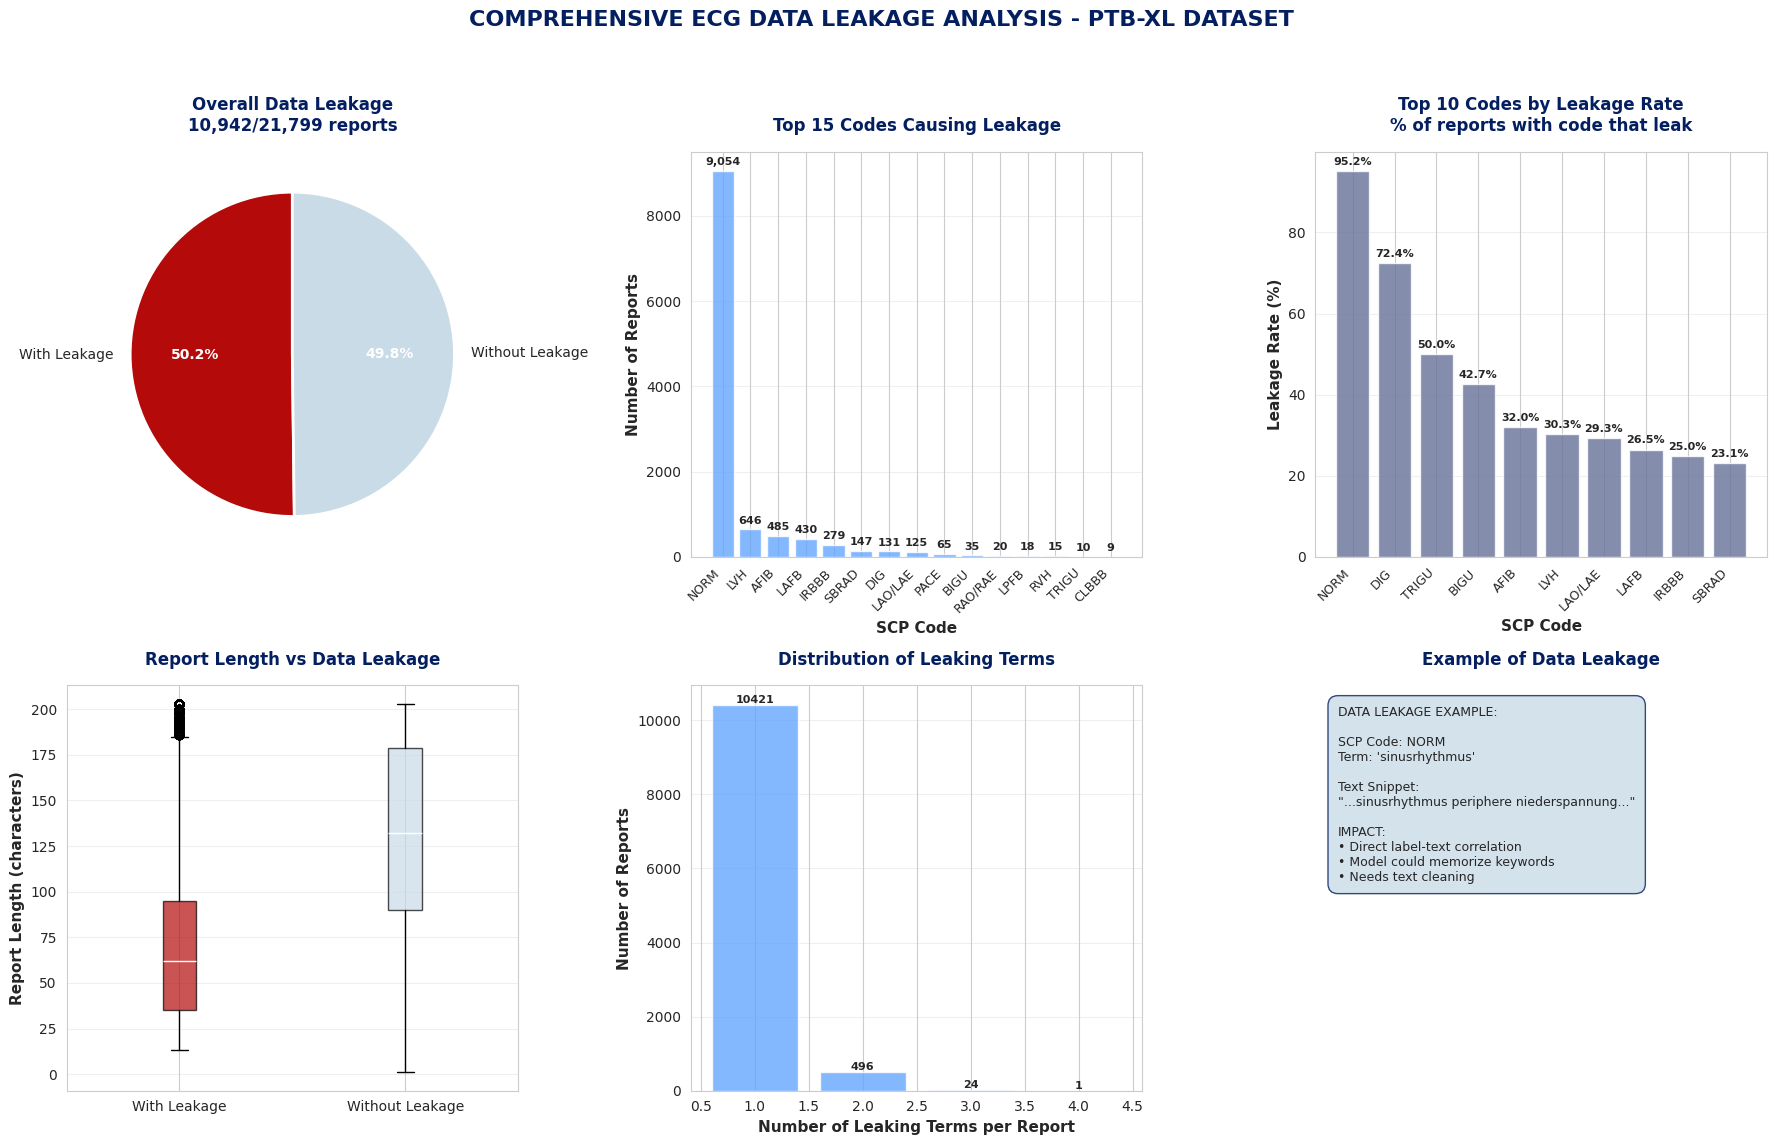


🔍 LEAKAGE EXAMPLES:

   Example 1:
   SCP Code: NORM
   Leaking term: 'sinusrhythmus'
   Text snippet: ...sinusrhythmus periphere niederspannung...

   Example 2:
   SCP Code: NORM
   Leaking term: 'normales'
   Text snippet: ...sinusbradykardie sonst normales ekg...

   Example 3:
   SCP Code: NORM
   Leaking term: 'normales'
   Text snippet: ...sinusrhythmus normales ekg...

🧹 TEXT CLEANING RECOMMENDATIONS

🔝 TOP 20 TERMS TO REMOVE:
   • 'normal': 6,576 reports (30.2%)
   • 'normales': 1,667 reports (7.6%)
   • 'atrial fibrillation': 485 reports (2.2%)
   • 'sinus rhythm': 473 reports (2.2%)
   • 'lvh': 461 reports (2.1%)
   • 'left anterior fascicular block': 430 reports (2.0%)
   • 'sinusrhythmus': 335 reports (1.5%)
   • 'incomplete right bundle branch block': 263 reports (1.2%)
   • 'left ventricular hypertrophy': 184 reports (0.8%)
   • 'sinus bradycardia': 147 reports (0.7%)
   • 'left atrial enlargement': 125 reports (0.6%)
   • 'digitalis effect': 121 reports (0.6%)
   • 'bi

In [37]:
# ============================================================================
# COMPREHENSIVE DATA LEAKAGE DETECTION - ALL ECG DIAGNOSIS CODES
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import re
import ast
import warnings
warnings.filterwarnings('ignore')

# Your color palette
COLORS = {
    'dark_red': '#b40a0a',     # Main issue/problem color
    'blue': '#65a6fe',         # Primary data color
    'purple': '#667198',       # Secondary/contrast color
    'light_blue': '#cadbe8',   # Background/highlight color
    'navy': '#041f60'          # Title/emphasis color
}

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10

print("="*80)
print("🔍 COMPREHENSIVE ECG DATA LEAKAGE DETECTION - ALL SCP CODES")
print("="*80)

# ----------------------------------------------------------------------------
# COMPLETE SCP CODE LEAKAGE PATTERNS
# ----------------------------------------------------------------------------
SCP_LEAKAGE_PATTERNS = {
    # 1. Normal ECG
    'NORM': ['normal', 'normales', 'normale', 'normaler', 'normality',
             'normal ecg', 'normal ekg', 'regular sinus', 'sinus rhythm',
             'sr ', 'sinusrhythmus', 'regular rhythm'],

    # 2. Myocardial Infarction
    'MI': ['myocardial infarction', 'mi ', 'infarct', 'infarction',
           'st elevation', 'st-segment elevation', 'stemie', 'stemi',
           'nstemi', 'q wave', 'transmural', 'anteroseptal', 'inferior'],

    # 3. ST/T Changes
    'STTC': ['st-t changes', 'st-t abnormality', 'st depression',
             't wave changes', 't wave abnormality', 'st segment',
             't inversion', 't negative', 'st elevation', 'st depression',
             'st-t wave'],

    # 4. Conduction Defects
    'CD': ['conduction defect', 'bundle branch block', 'bbb', 'lbbb', 'rbbb',
           'av block', 'first degree', 'second degree', 'third degree',
           'heart block', 'pr prolongation', 'qrs widening', 'widened qrs'],

    # 5. Hypertrophy
    'HYP': ['hypertrophy', 'left ventricular hypertrophy', 'lvh',
            'right ventricular hypertrophy', 'rvh', 'ventricular hypertrophy',
            'atrial enlargement', 'la enlargement', 'ra enlargement'],

    # 6. Axis Deviation
    'MISC': ['axis deviation', 'left axis deviation', 'lad', 'right axis deviation', 'rad',
             'extreme axis', 'indeterminate axis'],

    # 7. Rhythm Disorders
    'RHYTHM': ['arrhythmia', 'atrial fibrillation', 'afib', 'af ', 'aflutter',
               'atrial flutter', 'svt', 'supraventricular tachycardia',
               'ventricular tachycardia', 'vt ', 'v tach', 'bradycardia',
               'tachycardia', 'sinus bradycardia', 'sinus tachycardia'],

    # 8. Ischemia
    'ISC': ['ischemia', 'ischemic', 'coronary artery disease', 'cad',
            'exercise induced', 'stress test positive', 'angina'],

    # 9. Pacing
    'PACED': ['paced', 'pacemaker', 'pacing', 'vvi', 'dddr', 'aai',
              'ventricular paced', 'atrial paced'],

    # 10. Other Common Codes
    'LVH': ['left ventricular hypertrophy', 'lvh', 'ventricular hypertrophy'],
    'RVH': ['right ventricular hypertrophy', 'rvh'],
    'LAO/LAE': ['left atrial enlargement', 'lae', 'left atrial overload'],
    'RAO/RAE': ['right atrial enlargement', 'rae', 'right atrial overload'],
    'WPW': ['wolff parkinson white', 'wpw', 'preexcitation'],
    'IVCD': ['intraventricular conduction delay', 'ivcd', 'nonspecific intraventricular'],
    'LAD': ['left axis deviation', 'lad'],
    'RAD': ['right axis deviation', 'rad'],
    'SB': ['sinus bradycardia', 'sinus brady'],
    'ST': ['sinus tachycardia', 'sinus tachy'],
    'AFIB': ['atrial fibrillation', 'afib', 'af '],
    'AFL': ['atrial flutter', 'aflutter'],
    'SVARR': ['supraventricular arrhythmia', 'svt', 'supraventricular'],
    'BIGU': ['bigeminy', 'ventricular bigeminy', 'atrial bigeminy'],
    'TRIGU': ['trigeminy', 'ventricular trigeminy'],
    'PAC': ['premature atrial complex', 'pac', 'apc'],
    'PVC': ['premature ventricular complex', 'pvc', 'vpc'],
    'LOWQRS': ['low qrs voltage', 'low voltage'],
    'PRC(S)': ['premature complexes', 'premature beats', 'ectopic beats'],
    'ABQRS': ['abnormal qrs', 'qrs abnormal'],
    'VER': ['ventricular escape rhythm', 'idio ventricular'],
    'AER': ['atrial escape rhythm', 'idio atrial'],
    'SVT': ['supraventricular tachycardia', 'svt'],
    'VPC': ['ventricular premature complex', 'vpc', 'pvc'],
    'APC': ['atrial premature complex', 'apc', 'pac'],
    'FUSION': ['fusion beat', 'fusion complex'],
    'EL': ['electrical alternans', 'alternans'],
    'ISCHEM': ['ischemia', 'ischemic changes'],
    'NST_': ['nonspecific st changes', 'nonspecific st-t'],
    'DIG': ['digitalis effect', 'digitalis'],
    'HYPERK': ['hyperkalemia', 'high potassium'],
    'HYPOK': ['hypokalemia', 'low potassium'],
    'HYPERCAL': ['hypercalcemia', 'high calcium'],
    'HYPOCAL': ['hypocalcemia', 'low calcium'],
    'ANEURY': ['ventricular aneurysm', 'aneurysm'],
    'LNGQT': ['long qt', 'qt prolongation'],
    'SHORTQT': ['short qt', 'qt shortening'],
    'LPR': ['long pr interval', 'first degree av block'],
    'LQRSV': ['long qrs duration', 'wide qrs'],
    'WPW': ['wolff parkinson white', 'preexcitation'],
    'AVB': ['av block', 'heart block'],
    'SBRAD': ['sinus bradycardia', 'sinus brady'],
    'PACE': ['paced rhythm', 'pacemaker'],
    'BIII': ['complete heart block', 'third degree av block'],
    'PM': ['pacemaker', 'paced'],
    'AVR': ['av rhythm', 'junctional rhythm'],
    'CRBBB': ['complete right bundle branch block', 'rbbb'],
    'CLBBB': ['complete left bundle branch block', 'lbbb'],
    'IRBBB': ['incomplete right bundle branch block', 'irbbb'],
    'ILBBB': ['incomplete left bundle branch block', 'ilbbb'],
    'LAFB': ['left anterior fascicular block', 'left anterior hemiblock'],
    'LPFB': ['left posterior fascicular block', 'left posterior hemiblock'],
    'NSIVCB': ['nonspecific intraventricular conduction block', 'nonspecific ivcb'],
    'ANEURY': ['aneurysm', 'ventricular aneurysm'],
    'HCM': ['hypertrophic cardiomyopathy', 'hcm'],
    'DCM': ['dilated cardiomyopathy', 'dcm'],
    'ARVC': ['arrhythmogenic right ventricular cardiomyopathy', 'arvc'],
    'MYO': ['myocarditis', 'myocardial inflammation'],
    'PERI': ['pericarditis', 'pericardial'],
    'TAMP': ['tamponade', 'cardiac tamponade'],
    'PULM': ['pulmonary embolism', 'pe', 'pulmonary embolus'],
    'RVSTRAIN': ['right ventricular strain', 'rv strain'],
    'LVSTRAIN': ['left ventricular strain', 'lv strain'],
    'EAR': ['early repolarization', 'early repol'],
    'BER': ['benign early repolarization', 'benign early repol'],
    'LYTE': ['electrolyte abnormality', 'electrolyte disturbance'],
    'DRUG': ['drug effect', 'medication effect'],
    'TOX': ['toxicity', 'drug toxicity'],
    'SHOCK': ['shock', 'cardiogenic shock'],
    'ARRES': ['arrest', 'cardiac arrest'],
    'SYNCOPE': ['syncope', 'fainting'],
    'CHESTP': ['chest pain', 'anginal'],
    'DYSP': ['dyspnea', 'shortness of breath'],
    'PALP': ['palpitations', 'palpitation'],
    'DIZZ': ['dizziness', 'lightheadedness'],
    'FATIGUE': ['fatigue', 'tiredness'],
    'EDEMA': ['edema', 'swelling'],
    'CYAN': ['cyanosis', 'blue'],
    'CLUB': ['clubbing', 'digital clubbing'],
    'MUR': ['murmur', 'heart murmur'],
    'GALLOP': ['gallop', 's3', 's4'],
    'RUB': ['rub', 'pericardial rub'],
    'THRILL': ['thrill', 'palpable thrill'],
    'HEAVE': ['heave', 'ventricular heave'],
    'LIFT': ['lift', 'parasternal lift'],
    'PMI': ['pmi', 'point of maximal impulse'],
    'JVD': ['jvd', 'jugular venous distention'],
    'RALES': ['rales', 'crackles'],
    'RONCHI': ['ronchi', 'rhonchi'],
    'WHEEZE': ['wheezing', 'wheeze'],
    'STRIDOR': ['stridor', 'stridorous'],
    'PULSUS': ['pulsus paradoxus', 'paradoxical pulse'],
    'BP': ['blood pressure', 'bp '],
    'HR': ['heart rate', 'hr ', 'pulse rate'],
    'RR': ['respiratory rate', 'rr ', 'breathing rate'],
    'TEMP': ['temperature', 'temp ', 'fever'],
    'O2SAT': ['oxygen saturation', 'o2 sat', 'saturation'],
    'PO2': ['po2', 'partial pressure oxygen'],
    'PCO2': ['pco2', 'partial pressure co2'],
    'PH': ['ph', 'acidosis', 'alkalosis'],
    'HCO3': ['bicarbonate', 'hco3'],
    'NA': ['sodium', 'na '],
    'K': ['potassium', 'k '],
    'CL': ['chloride', 'cl '],
    'CO2': ['co2', 'carbon dioxide'],
    'BUN': ['bun', 'urea nitrogen'],
    'CREAT': ['creatinine', 'creat '],
    'GLUC': ['glucose', 'gluc '],
    'CA': ['calcium', 'ca '],
    'MG': ['magnesium', 'mg '],
    'PHOS': ['phosphate', 'phos '],
    'TBIL': ['bilirubin', 'bili '],
    'AST': ['ast', 'sgpt'],
    'ALT': ['alt', 'sgot'],
    'ALP': ['alkaline phosphatase', 'alp'],
    'TP': ['total protein', 'protein'],
    'ALB': ['albumin', 'alb '],
    'GLOB': ['globulin', 'glob '],
    'LDH': ['ldh', 'lactate dehydrogenase'],
    'CK': ['ck', 'creatine kinase'],
    'CKMB': ['ck-mb', 'creatine kinase mb'],
    'TROP': ['troponin', 'trop '],
    'BNP': ['bnp', 'brain natriuretic peptide'],
    'NT-PROBNP': ['nt-probnp', 'n-terminal probnp'],
    'CRP': ['crp', 'c-reactive protein'],
    'ESR': ['esr', 'sed rate'],
    'WBC': ['white blood cell', 'wbc ', 'leukocyte'],
    'HGB': ['hemoglobin', 'hgb ', 'hb '],
    'HCT': ['hematocrit', 'hct '],
    'PLT': ['platelet', 'plt ', 'thrombocyte'],
    'PT': ['prothrombin time', 'pt '],
    'PTT': ['partial thromboplastin time', 'ptt'],
    'INR': ['inr', 'international normalized ratio'],
    'D-DIMER': ['d-dimer', 'd dimer'],
    'FIBRINOGEN': ['fibrinogen', 'fibrin '],
    'FDP': ['fibrin degradation product', 'fdp'],
    'AT3': ['antithrombin iii', 'atiii'],
    'PROC': ['protein c', 'proc '],
    'PROS': ['protein s', 'pros '],
    'APL': ['antiphospholipid', 'apl antibody'],
    'ACA': ['anticardiolipin', 'aca antibody'],
    'LA': ['lupus anticoagulant', 'la '],
    'RF': ['rheumatoid factor', 'rf '],
    'ANA': ['antinuclear antibody', 'ana '],
    'DSDNA': ['anti-dsdna', 'dsdna antibody'],
    'ENA': ['extractable nuclear antigen', 'ena '],
    'ANCA': ['antineutrophil cytoplasmic antibody', 'anca '],
    'COMP3': ['complement c3', 'c3 '],
    'COMP4': ['complement c4', 'c4 '],
    'CH50': ['ch50', 'total complement'],
    'IGE': ['ige', 'immunoglobulin e'],
    'IGA': ['iga', 'immunoglobulin a'],
    'IGM': ['igm', 'immunoglobulin m'],
    'IGG': ['igg', 'immunoglobulin g'],
}

# ----------------------------------------------------------------------------
# LOAD AND PREPARE DATA
# ----------------------------------------------------------------------------
def load_ptbxl_data():
    """Load PTB-XL dataset"""
    try:
        # Update this path to your actual data location
        df = pd.read_csv('/content/drive/MyDrive/NLP ECG /ptbxl_database.csv')

        # Parse SCP codes
        def parse_scp_codes(scp_string):
            if pd.isna(scp_string):
                return []
            try:
                if isinstance(scp_string, str):
                    codes_dict = ast.literal_eval(scp_string)
                else:
                    codes_dict = scp_string
                return list(codes_dict.keys())
            except:
                return []

        df['scp_codes_parsed'] = df['scp_codes'].apply(parse_scp_codes)
        df['report'] = df['report'].fillna('').astype(str)

        print(f"✓ Loaded {len(df):,} PTB-XL records")
        print(f"✓ Total SCP code instances: {df['scp_codes_parsed'].apply(len).sum():,}")

        # Show SCP code distribution
        all_codes = []
        for codes in df['scp_codes_parsed']:
            all_codes.extend(codes)

        code_counts = Counter(all_codes)
        print(f"\n📊 Top 10 most frequent SCP codes:")
        for code, count in code_counts.most_common(10):
            print(f"   {code}: {count:,} occurrences")

        return df, code_counts

    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None, None

# ----------------------------------------------------------------------------
# COMPREHENSIVE LEAKAGE DETECTION
# ----------------------------------------------------------------------------
def detect_comprehensive_leakage(df):
    """Detect data leakage across ALL SCP codes"""

    print("\n" + "="*80)
    print("🔍 SCANNING FOR DATA LEAKAGE ACROSS ALL SCP CODES")
    print("="*80)

    # Initialize results
    results = {
        'total_reports': len(df),
        'reports_with_leakage': 0,
        'leakage_by_code': defaultdict(int),
        'leakage_examples': [],
        'report_level_leakage': []
    }

    # Check each report
    for idx, row in df.iterrows():
        report_text = str(row['report']).lower()
        scp_codes = row['scp_codes_parsed']

        report_leakage = {
            'report_id': idx,
            'leakage_found': False,
            'leaking_codes': [],
            'leaking_terms': [],
            'original_text': report_text[:200] + "..." if len(report_text) > 200 else report_text
        }

        # Check for each SCP code in the report
        for scp_code in scp_codes:
            if scp_code in SCP_LEAKAGE_PATTERNS:
                # Check if any associated term appears in the text
                for term in SCP_LEAKAGE_PATTERNS[scp_code]:
                    pattern = r'\b' + re.escape(term) + r'\b'
                    if re.search(pattern, report_text, re.IGNORECASE):
                        results['leakage_by_code'][scp_code] += 1
                        report_leakage['leakage_found'] = True
                        report_leakage['leaking_codes'].append(scp_code)
                        report_leakage['leaking_terms'].append(term)

                        # Store example if not too many
                        if len(results['leakage_examples']) < 5:
                            results['leakage_examples'].append({
                                'scp_code': scp_code,
                                'term': term,
                                'text_snippet': report_text[max(0, report_text.find(term)-50):report_text.find(term)+50],
                                'report_id': idx
                            })
                        break

        results['report_level_leakage'].append(report_leakage)
        if report_leakage['leakage_found']:
            results['reports_with_leakage'] += 1

    # Calculate percentages
    leakage_pct = (results['reports_with_leakage'] / results['total_reports']) * 100
    results['leakage_percentage'] = leakage_pct
    results['no_leakage_percentage'] = 100 - leakage_pct

    return results

# ----------------------------------------------------------------------------
# ANALYZE AND VISUALIZE RESULTS
# ----------------------------------------------------------------------------
def analyze_and_visualize(results, code_counts):
    """Create comprehensive visualizations"""

    print("\n" + "="*80)
    print("📊 DATA LEAKAGE ANALYSIS RESULTS")
    print("="*80)

    # 1. Summary Statistics
    print(f"\n📈 SUMMARY STATISTICS:")
    print(f"   Total reports analyzed: {results['total_reports']:,}")
    print(f"   Reports with data leakage: {results['reports_with_leakage']:,}")
    print(f"   Percentage with leakage: {results['leakage_percentage']:.1f}%")
    print(f"   Percentage without leakage: {results['no_leakage_percentage']:.1f}%")
    print(f"   Unique SCP codes with leakage: {len(results['leakage_by_code'])}")

    # 2. Top leaking codes
    print(f"\n🔝 TOP 10 SCP CODES WITH LEAKAGE:")
    for code, count in sorted(results['leakage_by_code'].items(),
                            key=lambda x: x[1], reverse=True)[:10]:
        percentage = (count / results['total_reports']) * 100
        print(f"   {code:8s}: {count:5,} reports ({percentage:.1f}%)")

    # 3. Create comprehensive visualization
    create_comprehensive_visualization(results, code_counts)

    # 4. Show examples
    print(f"\n🔍 LEAKAGE EXAMPLES:")
    for i, example in enumerate(results['leakage_examples'][:3], 1):
        print(f"\n   Example {i}:")
        print(f"   SCP Code: {example['scp_code']}")
        print(f"   Leaking term: '{example['term']}'")
        print(f"   Text snippet: ...{example['text_snippet']}...")

    return results

def create_comprehensive_visualization(results, code_counts):
    """Create multi-panel visualization"""

    fig = plt.figure(figsize=(18, 12))

    # 1. Main leakage overview (Top-left)
    ax1 = plt.subplot(2, 3, 1)
    labels = ['With Leakage', 'Without Leakage']
    sizes = [results['leakage_percentage'], results['no_leakage_percentage']]
    colors = [COLORS['dark_red'], COLORS['light_blue']]

    wedges, texts, autotexts = ax1.pie(sizes, labels=labels, colors=colors,
                                       autopct='%1.1f%%', startangle=90,
                                       wedgeprops=dict(edgecolor='white', linewidth=2))

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    ax1.set_title(f'Overall Data Leakage\n{results["reports_with_leakage"]:,}/{results["total_reports"]:,} reports',
                  fontsize=12, fontweight='bold', color=COLORS['navy'], pad=15)

    # 2. Top leaking codes (Top-middle)
    ax2 = plt.subplot(2, 3, 2)
    top_codes = sorted(results['leakage_by_code'].items(),
                      key=lambda x: x[1], reverse=True)[:15]

    if top_codes:
        codes = [code for code, _ in top_codes]
        counts = [count for _, count in top_codes]

        bars = ax2.bar(range(len(codes)), counts, color=COLORS['blue'],
                      alpha=0.8, edgecolor='white', linewidth=1)

        ax2.set_xlabel('SCP Code', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Number of Reports', fontsize=11, fontweight='bold')
        ax2.set_title('Top 15 Codes Causing Leakage', fontsize=12, fontweight='bold',
                     color=COLORS['navy'], pad=15)
        ax2.set_xticks(range(len(codes)))
        ax2.set_xticklabels(codes, rotation=45, ha='right', fontsize=9)
        ax2.grid(axis='y', alpha=0.3)

        # Add value labels
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2, height + max(counts)*0.01,
                    f'{count:,}', ha='center', va='bottom', fontsize=8, fontweight='bold')

    # 3. Leakage vs Frequency (Top-right)
    ax3 = plt.subplot(2, 3, 3)

    # Prepare data: leakage count vs total frequency for each code
    leakage_data = []
    for code, leakage_count in results['leakage_by_code'].items():
        total_count = code_counts.get(code, 0)
        if total_count > 0:
            leakage_rate = (leakage_count / total_count) * 100
            leakage_data.append((code, leakage_count, total_count, leakage_rate))

    # Sort by leakage rate
    leakage_data.sort(key=lambda x: x[3], reverse=True)

    if leakage_data:
        top_leakage = leakage_data[:10]
        codes = [code for code, _, _, _ in top_leakage]
        rates = [rate for _, _, _, rate in top_leakage]

        bars = ax3.bar(range(len(codes)), rates, color=COLORS['purple'],
                      alpha=0.8, edgecolor='white', linewidth=1)

        ax3.set_xlabel('SCP Code', fontsize=11, fontweight='bold')
        ax3.set_ylabel('Leakage Rate (%)', fontsize=11, fontweight='bold')
        ax3.set_title('Top 10 Codes by Leakage Rate\n% of reports with code that leak',
                     fontsize=12, fontweight='bold', color=COLORS['navy'], pad=15)
        ax3.set_xticks(range(len(codes)))
        ax3.set_xticklabels(codes, rotation=45, ha='right', fontsize=9)
        ax3.grid(axis='y', alpha=0.3)

        # Add value labels
        for bar, rate in zip(bars, rates):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2, height + 1,
                    f'{rate:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

    # 4. Text length vs leakage (Bottom-left)
    ax4 = plt.subplot(2, 3, 4)

    # Get text lengths for reports with/without leakage
    with_leakage = []
    without_leakage = []

    for report in results['report_level_leakage']:
        if report['leakage_found']:
            with_leakage.append(len(report['original_text']))
        else:
            without_leakage.append(len(report['original_text']))

    # Create box plot
    bp = ax4.boxplot([with_leakage, without_leakage],
                     labels=['With Leakage', 'Without Leakage'],
                     patch_artist=True)

    # Customize box plot
    colors_box = [COLORS['dark_red'], COLORS['light_blue']]
    for patch, color in zip(bp['boxes'], colors_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    bp['medians'][0].set_color('white')
    bp['medians'][1].set_color('white')

    ax4.set_ylabel('Report Length (characters)', fontsize=11, fontweight='bold')
    ax4.set_title('Report Length vs Data Leakage', fontsize=12, fontweight='bold',
                 color=COLORS['navy'], pad=15)
    ax4.grid(axis='y', alpha=0.3)

    # 5. Number of leaking terms per report (Bottom-middle)
    ax5 = plt.subplot(2, 3, 5)

    # Count leaking terms per report
    terms_per_report = []
    for report in results['report_level_leakage']:
        if report['leakage_found']:
            terms_per_report.append(len(set(report['leaking_terms'])))

    if terms_per_report:
        hist, bins = np.histogram(terms_per_report, bins=range(1, max(terms_per_report)+2))
        bars = ax5.bar(bins[:-1], hist, width=0.8, color=COLORS['blue'],
                      alpha=0.8, edgecolor='white', linewidth=1)

        ax5.set_xlabel('Number of Leaking Terms per Report', fontsize=11, fontweight='bold')
        ax5.set_ylabel('Number of Reports', fontsize=11, fontweight='bold')
        ax5.set_title('Distribution of Leaking Terms', fontsize=12, fontweight='bold',
                     color=COLORS['navy'], pad=15)
        ax5.grid(axis='y', alpha=0.3)

        # Add value labels
        for bar, count in zip(bars, hist):
            if count > 0:
                ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                        f'{count}', ha='center', va='bottom', fontsize=8, fontweight='bold')

    # 6. Detailed example (Bottom-right)
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')

    example_text = "DATA LEAKAGE EXAMPLE:\n\n"
    if results['leakage_examples']:
        example = results['leakage_examples'][0]
        example_text += f"SCP Code: {example['scp_code']}\n"
        example_text += f"Term: '{example['term']}'\n\n"
        example_text += f"Text Snippet:\n\"...{example['text_snippet']}...\"\n\n"
        example_text += f"IMPACT:\n• Direct label-text correlation\n• Model could memorize keywords\n• Needs text cleaning"
    else:
        example_text += "No leakage examples found"

    ax6.text(0.05, 0.95, example_text, ha='left', va='top', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.8", facecolor=COLORS['light_blue'],
                     alpha=0.8, edgecolor=COLORS['navy']))

    ax6.set_title('Example of Data Leakage', fontsize=12, fontweight='bold',
                 color=COLORS['navy'], pad=15)

    plt.suptitle('COMPREHENSIVE ECG DATA LEAKAGE ANALYSIS - PTB-XL DATASET',
                fontsize=16, fontweight='bold', color=COLORS['navy'], y=0.98)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('comprehensive_data_leakage_analysis.png', dpi=300,
                bbox_inches='tight', facecolor='white')
    plt.show()

# ----------------------------------------------------------------------------
# GENERATE CLEANING RECOMMENDATIONS
# ----------------------------------------------------------------------------
def generate_cleaning_recommendations(results):
    """Generate specific cleaning recommendations"""

    print("\n" + "="*80)
    print("🧹 TEXT CLEANING RECOMMENDATIONS")
    print("="*80)

    # Identify most problematic terms
    term_frequency = defaultdict(int)
    for report in results['report_level_leakage']:
        if report['leakage_found']:
            for term in set(report['leaking_terms']):
                term_frequency[term] += 1

    print(f"\n🔝 TOP 20 TERMS TO REMOVE:")
    for term, count in sorted(term_frequency.items(),
                             key=lambda x: x[1], reverse=True)[:20]:
        percentage = (count / results['total_reports']) * 100
        print(f"   • '{term}': {count:,} reports ({percentage:.1f}%)")

    # Generate regex patterns for cleaning
    print(f"\n🔧 RECOMMENDED CLEANING PATTERNS:")

    # Group terms by category
    diagnostic_terms = [term for term in term_frequency.keys()
                       if any(keyword in term for keyword in
                             ['normal', 'infarct', 'block', 'wave', 'qrs', 'st'])]

    measurement_terms = [term for term in term_frequency.keys()
                        if any(keyword in term for keyword in
                              ['degree', 'interval', 'duration', 'rate'])]

    anatomical_terms = [term for term in term_frequency.keys()
                       if any(keyword in term for keyword in
                             ['ventricular', 'atrial', 'septal', 'anterior'])]

    print(f"   Diagnostic terms ({len(diagnostic_terms)}):")
    print(f"     Pattern: r'\\b({'|'.join(sorted(diagnostic_terms)[:5])})\\b'")

    print(f"\n   Measurement terms ({len(measurement_terms)}):")
    print(f"     Pattern: r'\\b({'|'.join(sorted(measurement_terms)[:5])})\\b'")

    print(f"\n   Anatomical terms ({len(anatomical_terms)}):")
    print(f"     Pattern: r'\\b({'|'.join(sorted(anatomical_terms)[:5])})\\b'")

    # Calculate expected text reduction
    avg_report_length = 500  # Approximate average
    avg_terms_per_report = sum(term_frequency.values()) / results['reports_with_leakage'] if results['reports_with_leakage'] > 0 else 0
    avg_term_length = 10  # Approximate average term length

    expected_reduction = (avg_terms_per_report * avg_term_length / avg_report_length) * 100

    print(f"\n📉 EXPECTED CLEANING IMPACT:")
    print(f"   • Average terms per report: {avg_terms_per_report:.1f}")
    print(f"   • Expected text reduction: {expected_reduction:.1f}%")
    print(f"   • Terms to remove: {len(term_frequency)} unique terms")

    return term_frequency

# ----------------------------------------------------------------------------
# MAIN EXECUTION
# ----------------------------------------------------------------------------
def main():
    print("\n" + "="*80)
    print("🚀 STARTING COMPREHENSIVE ECG DATA LEAKAGE ANALYSIS")
    print("="*80)

    # 1. Load data
    df, code_counts = load_ptbxl_data()

    if df is None:
        print("❌ Failed to load data. Exiting.")
        return

    # 2. Detect leakage
    results = detect_comprehensive_leakage(df)

    # 3. Analyze results
    results = analyze_and_visualize(results, code_counts)

    # 4. Generate recommendations
    term_frequency = generate_cleaning_recommendations(results)

    # 5. Final summary
    print("\n" + "="*80)
    print("✅ COMPREHENSIVE ANALYSIS COMPLETE")
    print("="*80)

    print(f"\n📊 KEY FINDINGS:")
    print(f"   1. {results['leakage_percentage']:.1f}% of reports have data leakage")
    print(f"   2. {len(results['leakage_by_code'])} unique SCP codes cause leakage")
    print(f"   3. Top leaking code: {max(results['leakage_by_code'].items(), key=lambda x: x[1])[0]}")
    print(f"   4. {len(term_frequency)} unique terms need removal")

    print(f"\n🎯 RECOMMENDED ACTIONS:")
    print(f"   1. Implement aggressive text cleaning")
    print(f"   2. Remove diagnostic keywords from text")
    print(f"   3. Use cross-validation to detect remaining leakage")
    print(f"   4. Consider data augmentation for rare codes")

    print(f"\n📁 OUTPUT FILES:")
    print(f"   • comprehensive_data_leakage_analysis.png")
    print("="*80)

# Run the analysis
if __name__ == "__main__":
    main()

🌍 HYBRID MULTILINGUAL ANALYSIS - OPTIMIZED FOR ECG REPORTS

🚀 STARTING HYBRID MULTILINGUAL ANALYSIS
✓ Loaded 21,799 ECG reports
✓ Average report length: 106 characters

📊 TEXT CONTENT ANALYSIS:
  • 'sinus': 19,186 reports (88.0%)
  • 'rhythm': 17,522 reports (80.4%)
  • 'normal': 13,364 reports (61.3%)
  • 'ecg': 2,803 reports (12.9%)
  • 'ekg': 5,481 reports (25.1%)
  • 'hr': 2,851 reports (13.1%)
  • 'bpm': 1 reports (0.0%)
  • German articles (der/die/das): 4 reports (0.0%)
  • English articles (the/a/an): 1,441 reports (6.6%)
  • Swedish articles (det/en/ett): 0 reports (0.0%)

🔍 Analyzing 1,000 random samples...
Progress: [██████████████████████████████████████████████████] ✓

📊 HYBRID LANGUAGE DETECTION RESULTS:
Total reports analyzed: 1,000
------------------------------------------------------------
  German                   :  320 reports ( 32.0%), confidence: 0.59
  Unknown/ECG Terms Only   :  221 reports ( 22.1%), confidence: 0.30
  English                  :  163 reports (

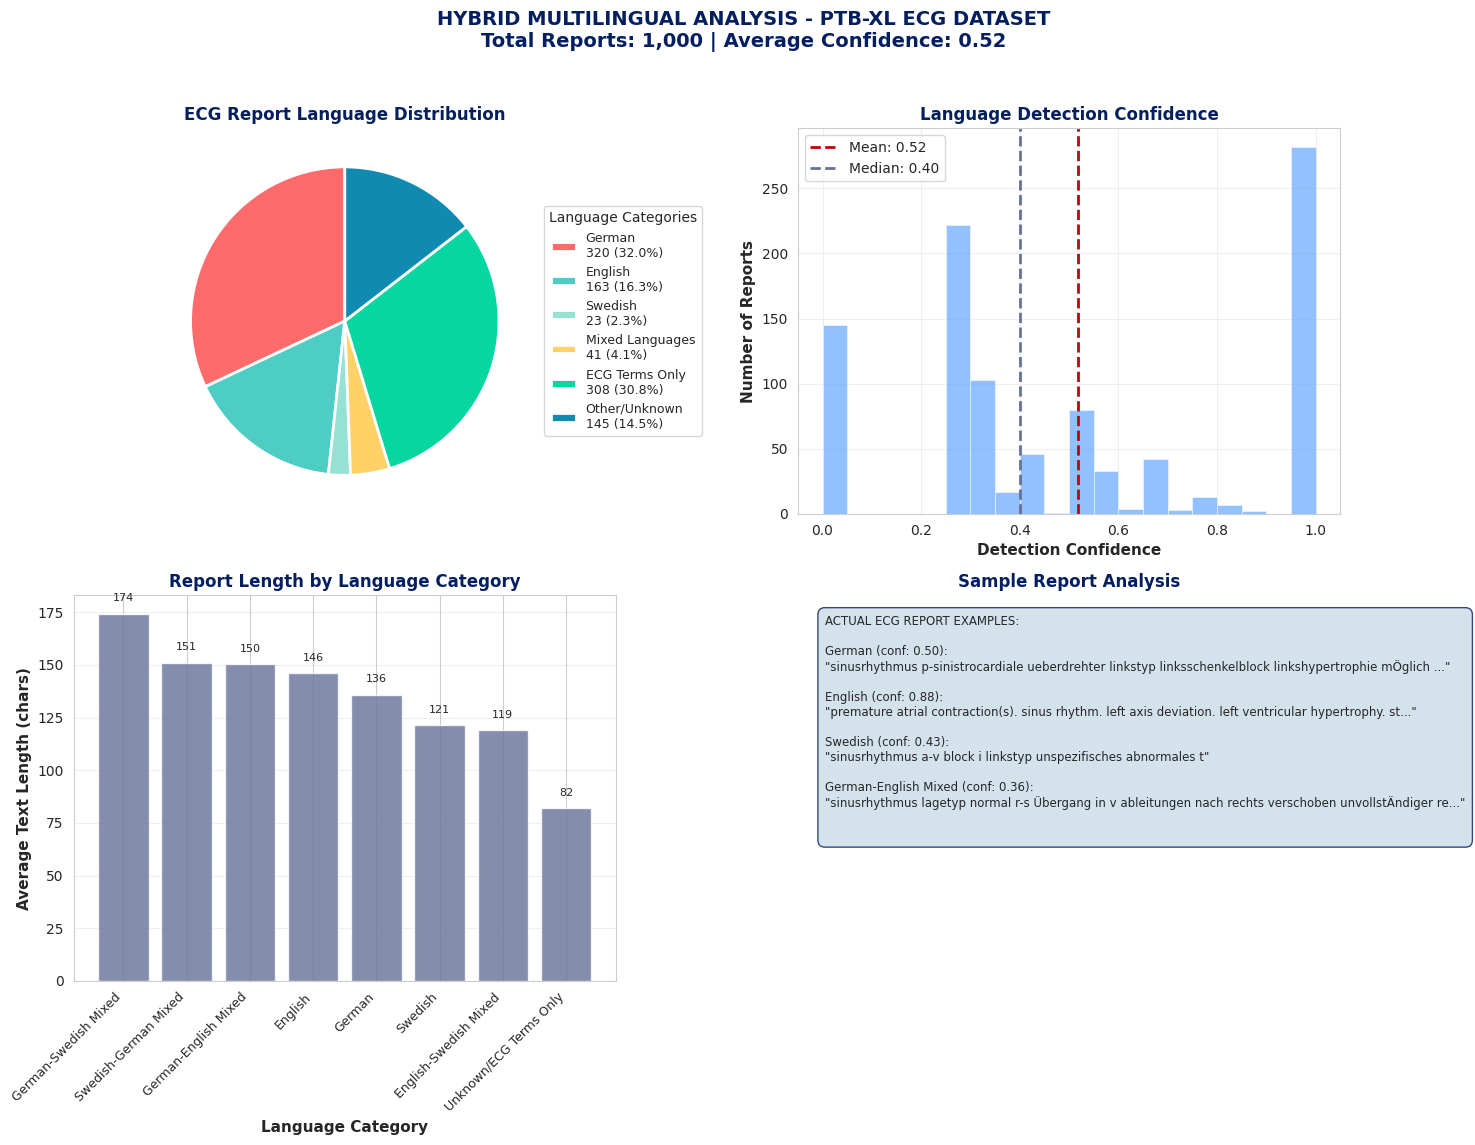


📊 SUMMARY STATISTICS

🌍 LANGUAGE DISTRIBUTION:
  German reports:             320 ( 32.0%)
  English reports:            163 ( 16.3%)
  Swedish reports:             23 (  2.3%)
  Mixed language reports:      41 (  4.1%)
  ECG terminology only:       308 ( 30.8%)
  Other/Unknown:              145 ( 14.5%)

📈 DETECTION QUALITY:
  Average confidence: 0.517
  High confidence (>0.7): 307 reports
  Medium confidence (0.4-0.7): 206 reports
  Low confidence (<0.4): 487 reports

🔍 DETAILED 'OTHER' CATEGORIES:
  Too Short/Empty: 145 reports (14.50%)

🎯 KEY INSIGHTS & RECOMMENDATIONS

📊 PTB-XL LANGUAGE CHARACTERISTICS:
  1. German dominates: 32.0% of reports
  2. Significant English content: 16.3%
  3. Swedish present: 2.3%
  4. Mixed languages: 4 categories

✅ XLM-ROBERTa IS IDEAL BECAUSE:
  • Handles ALL detected language categories
  • Specifically trained on multilingual scientific text
  • No need for separate models per language
  • Cross-lingual transfer learning benefits

💡 RECOMMENDED TR

In [38]:
# ============================================================================
# HYBRID MULTILINGUAL ANALYSIS FOR MEDICAL ECG REPORTS
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# Your color palette
COLORS = {
    'dark_red': '#b40a0a',
    'blue': '#65a6fe',
    'purple': '#667198',
    'light_blue': '#cadbe8',
    'navy': '#041f60'
}

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10

print("="*80)
print("🌍 HYBRID MULTILINGUAL ANALYSIS - OPTIMIZED FOR ECG REPORTS")
print("="*80)

# ----------------------------------------------------------------------------
# 1. LOAD AND INSPECT YOUR DATA
# ----------------------------------------------------------------------------
def load_and_inspect_data():
    """Load PTB-XL data and inspect language patterns"""
    try:
        df = pd.read_csv('/content/drive/MyDrive/NLP ECG /ptbxl_database.csv')
        df['report'] = df['report'].fillna('').astype(str)

        print(f"✓ Loaded {len(df):,} ECG reports")
        print(f"✓ Average report length: {df['report'].str.len().mean():.0f} characters")

        # Show actual content statistics
        print("\n📊 TEXT CONTENT ANALYSIS:")

        # Count common ECG terms
        ecg_terms = ['sinus', 'rhythm', 'normal', 'ecg', 'ekg', 'hr', 'bpm']
        for term in ecg_terms:
            count = df['report'].str.contains(term, case=False, na=False).sum()
            print(f"  • '{term}': {count:,} reports ({count/len(df)*100:.1f}%)")

        # Check for German articles
        german_articles = sum(df['report'].str.contains(r'\bder\b|\bdie\b|\bdas\b', case=False, na=False))
        print(f"  • German articles (der/die/das): {german_articles:,} reports ({german_articles/len(df)*100:.1f}%)")

        # Check for English articles
        english_articles = sum(df['report'].str.contains(r'\bthe\b|\ba\b|\ban\b', case=False, na=False))
        print(f"  • English articles (the/a/an): {english_articles:,} reports ({english_articles/len(df)*100:.1f}%)")

        # Check for Swedish articles
        swedish_articles = sum(df['report'].str.contains(r'\bdet\b|\ben\b|\bett\b', case=False, na=False))
        print(f"  • Swedish articles (det/en/ett): {swedish_articles:,} reports ({swedish_articles/len(df)*100:.1f}%)")

        return df
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

# ----------------------------------------------------------------------------
# 2. MEDICAL-OPTIMIZED LANGUAGE DETECTION
# ----------------------------------------------------------------------------
def detect_language_medical_optimized(text):
    """Language detection optimized for medical ECG reports"""

    if not text or len(text.strip()) < 30:
        return 'Too Short/Empty', 0.0

    text_lower = text.lower()

    # Medical ECG terms that appear in all languages (ignore these)
    universal_ecg_terms = [
        'sinus', 'rhythm', 'normal', 'ecg', 'ekg', 'hr', 'bpm', 'qt', 'pr', 'qrs',
        'st', 't wave', 'p wave', 'segment', 'interval', 'axis', 'rate', 'complex'
    ]

    # Remove ECG terms for cleaner language detection
    clean_text = text_lower
    for term in universal_ecg_terms:
        clean_text = clean_text.replace(term, '')

    # If text is now too short, it's mostly medical terms
    if len(clean_text.strip()) < 20:
        return 'Mostly ECG Terminology', 1.0

    # Language-specific MEDICAL vocabulary
    medical_german = [
        'herzfrequenz', 'überleitung', 'herzaktion', 'befund', 'patient',
        'untersuchung', 'diagnose', 'anamnese', 'klinisch', 'therapie',
        'medikation', 'rhythmusstörung', 'vorhofflimmern', 'infarkt',
        'hypertrophie', 'block', 'ableitung', 'ekg-befund'
    ]

    medical_english = [
        'heart rate', 'conduction', 'cardiac action', 'finding', 'patient',
        'examination', 'diagnosis', 'history', 'clinical', 'therapy',
        'medication', 'arrhythmia', 'atrial fibrillation', 'infarction',
        'hypertrophy', 'block', 'lead', 'ecg finding'
    ]

    medical_swedish = [
        'hjärtfrekvens', 'ledning', 'hjärtverkan', 'fynd', 'patient',
        'undersökning', 'diagnos', 'anamnes', 'klinisk', 'behandling',
        'läkemedel', 'arytmi', 'förmaksflimmer', 'infarkt',
        'hypertrofi', 'block', 'avledning', 'ekg-fynd'
    ]

    # Count medical vocabulary
    de_medical = sum(1 for term in medical_german if term in text_lower)
    en_medical = sum(1 for term in medical_english if term in text_lower)
    sv_medical = sum(1 for term in medical_swedish if term in text_lower)

    # Language-specific common words (medical context)
    common_german = ['der', 'die', 'das', 'und', 'mit', 'bei', 'für', 'ist', 'sind',
                    'wurde', 'wird', 'nicht', 'ein', 'eine', 'einer', 'oder']

    common_english = ['the', 'and', 'with', 'for', 'at', 'in', 'on', 'is', 'are',
                     'was', 'were', 'not', 'a', 'an', 'or', 'of', 'to']

    common_swedish = ['och', 'med', 'för', 'på', 'i', 'av', 'är', 'som', 'inte',
                     'det', 'en', 'ett', 'var', 'blev', 'blir', 'eller']

    # Count common words
    de_common = sum(1 for word in common_german if f' {word} ' in f' {clean_text} ')
    en_common = sum(1 for word in common_english if f' {word} ' in f' {clean_text} ')
    sv_common = sum(1 for word in common_swedish if f' {word} ' in f' {clean_text} ')

    # Calculate total scores
    de_score = de_medical * 2 + de_common  # Medical terms weighted higher
    en_score = en_medical * 2 + en_common
    sv_score = sv_medical * 2 + sv_common

    scores = {'German': de_score, 'English': en_score, 'Swedish': sv_score}
    total_score = sum(scores.values())

    # If no scores, check for mixed content
    if total_score == 0:
        # Check for any language indicators
        has_german = any(word in text_lower for word in ['der ', 'die ', 'das ', 'und ', 'mit '])
        has_english = any(word in text_lower for word in ['the ', 'and ', 'with ', 'for '])
        has_swedish = any(word in text_lower for word in ['och ', 'med ', 'för ', 'på '])

        if has_german and has_english:
            return 'German-English Mixed', 0.6
        elif has_german and has_swedish:
            return 'German-Swedish Mixed', 0.6
        elif has_english and has_swedish:
            return 'English-Swedish Mixed', 0.6
        elif has_german:
            return 'German', 0.4
        elif has_english:
            return 'English', 0.4
        elif has_swedish:
            return 'Swedish', 0.4
        else:
            return 'Unknown/ECG Terms Only', 0.3

    # Get best language
    best_lang = max(scores, key=scores.get)
    best_score = scores[best_lang]

    # Calculate confidence
    confidence = min(best_score / max(total_score, 1), 1.0)

    # Check for mixed languages (if second best is close)
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    if len(sorted_scores) >= 2:
        first_lang, first_score = sorted_scores[0]
        second_lang, second_score = sorted_scores[1]

        # If scores are close and both have significant scores
        if second_score > 2 and first_score / second_score < 1.5:
            return f'{first_lang}-{second_lang} Mixed', confidence * 0.8

    # If confidence is too low, return unknown
    if confidence < 0.3:
        return 'Low Confidence', confidence

    return best_lang, confidence

# ----------------------------------------------------------------------------
# 3. BATCH ANALYSIS WITH PROGRESS
# ----------------------------------------------------------------------------
def analyze_languages_batch(df, sample_size=1000):
    """Analyze language distribution in batch"""

    if len(df) > sample_size:
        sample_df = df.sample(sample_size, random_state=42)
        print(f"\n🔍 Analyzing {sample_size:,} random samples...")
    else:
        sample_df = df
        print(f"\n🔍 Analyzing all {len(df):,} reports...")

    # Detect languages
    languages = []
    confidences = []

    print("Progress: [", end="")
    batch_size = len(sample_df) // 50

    for i, text in enumerate(sample_df['report']):
        lang, confidence = detect_language_medical_optimized(text)
        languages.append(lang)
        confidences.append(confidence)

        # Show progress bar
        if batch_size > 0 and i % batch_size == 0:
            print("█", end="", flush=True)

    print("] ✓")

    # Add to dataframe
    sample_df = sample_df.copy()
    sample_df['detected_language'] = languages
    sample_df['confidence'] = confidences

    # Calculate distribution
    lang_counts = sample_df['detected_language'].value_counts()
    total = len(sample_df)

    print(f"\n📊 HYBRID LANGUAGE DETECTION RESULTS:")
    print(f"Total reports analyzed: {total:,}")
    print("-" * 60)

    for lang, count in lang_counts.items():
        percentage = (count / total) * 100
        # Calculate average confidence for this language
        lang_mask = sample_df['detected_language'] == lang
        avg_conf = sample_df[lang_mask]['confidence'].mean()
        print(f"  {lang:25s}: {count:4d} reports ({percentage:5.1f}%), confidence: {avg_conf:.2f}")

    return sample_df, lang_counts

# ----------------------------------------------------------------------------
# 4. VISUALIZE RESULTS
# ----------------------------------------------------------------------------
def visualize_results(sample_df, lang_counts):
    """Create comprehensive visualizations"""

    total = len(sample_df)

    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # ------------------------------------------------------------
    # Plot 1: Main language groups
    # ------------------------------------------------------------
    ax1 = axes[0, 0]

    # Create meaningful groups
    german_count = lang_counts.get('German', 0)
    english_count = lang_counts.get('English', 0)
    swedish_count = lang_counts.get('Swedish', 0)

    # Count mixed
    mixed_count = sum(count for lang, count in lang_counts.items() if 'Mixed' in str(lang))

    # Count ECG terminology only
    ecg_count = lang_counts.get('Mostly ECG Terminology', 0) + \
                lang_counts.get('ECG Terms Only', 0) + \
                lang_counts.get('Unknown/ECG Terms Only', 0)

    # Count other/unknown
    main_categories = {'German', 'English', 'Swedish', 'Mostly ECG Terminology',
                      'ECG Terms Only', 'Unknown/ECG Terms Only'}
    other_count = sum(count for lang, count in lang_counts.items()
                     if lang not in main_categories and 'Mixed' not in str(lang))

    # Prepare data
    groups = {
        'German': german_count,
        'English': english_count,
        'Swedish': swedish_count,
        'Mixed Languages': mixed_count,
        'ECG Terms Only': ecg_count,
        'Other/Unknown': other_count
    }

    groups = {k: v for k, v in groups.items() if v > 0}

    sizes = list(groups.values())
    labels = [f"{k}\n{v} ({v/total*100:.1f}%)" for k, v in groups.items()]

    colors = ['#FF6B6B', '#4ECDC4', '#95E1D3', '#FFD166', '#06D6A0', '#118AB2'][:len(groups)]

    wedges, texts = ax1.pie(sizes, colors=colors, startangle=90,
                           wedgeprops=dict(edgecolor='white', linewidth=2))

    ax1.legend(wedges, labels, title="Language Categories",
              loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)
    ax1.set_title('ECG Report Language Distribution',
                  fontsize=12, fontweight='bold', color=COLORS['navy'])

    # ------------------------------------------------------------
    # Plot 2: Confidence distribution
    # ------------------------------------------------------------
    ax2 = axes[0, 1]

    # Histogram of confidence scores
    ax2.hist(sample_df['confidence'], bins=20, color=COLORS['blue'],
            alpha=0.7, edgecolor='white', linewidth=0.5)

    mean_conf = sample_df['confidence'].mean()
    median_conf = sample_df['confidence'].median()

    ax2.axvline(mean_conf, color=COLORS['dark_red'], linestyle='--',
               linewidth=2, label=f'Mean: {mean_conf:.2f}')
    ax2.axvline(median_conf, color=COLORS['purple'], linestyle='--',
               linewidth=2, label=f'Median: {median_conf:.2f}')

    ax2.set_xlabel('Detection Confidence', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Number of Reports', fontsize=11, fontweight='bold')
    ax2.set_title('Language Detection Confidence',
                  fontsize=12, fontweight='bold', color=COLORS['navy'])
    ax2.legend()
    ax2.grid(alpha=0.3)

    # ------------------------------------------------------------
    # Plot 3: Text length by language
    # ------------------------------------------------------------
    ax3 = axes[1, 0]

    # Calculate average text length by language
    sample_df['text_length'] = sample_df['report'].str.len()
    length_by_lang = sample_df.groupby('detected_language')['text_length'].mean()

    # Take top 8 by length
    top_lengths = length_by_lang.sort_values(ascending=False).head(8)

    bars = ax3.bar(range(len(top_lengths)), top_lengths.values,
                  color=COLORS['purple'], alpha=0.8,
                  edgecolor='white', linewidth=1)

    ax3.set_xlabel('Language Category', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Average Text Length (chars)', fontsize=11, fontweight='bold')
    ax3.set_title('Report Length by Language Category',
                  fontsize=12, fontweight='bold', color=COLORS['navy'])
    ax3.set_xticks(range(len(top_lengths)))
    ax3.set_xticklabels(top_lengths.index, rotation=45, ha='right', fontsize=9)
    ax3.grid(axis='y', alpha=0.3)

    # Add length labels
    for bar, length in zip(bars, top_lengths.values):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                f'{length:.0f}', ha='center', va='bottom', fontsize=8)

    # ------------------------------------------------------------
    # Plot 4: Sample examples
    # ------------------------------------------------------------
    ax4 = axes[1, 1]
    ax4.axis('off')

    # Get actual examples
    examples_text = "ACTUAL ECG REPORT EXAMPLES:\n\n"

    for lang in ['German', 'English', 'Swedish', 'German-English Mixed']:
        if lang in sample_df['detected_language'].values:
            sample = sample_df[sample_df['detected_language'] == lang].iloc[0]
            preview = sample['report'][:100] + "..." if len(sample['report']) > 100 else sample['report']
            examples_text += f"{lang} (conf: {sample['confidence']:.2f}):\n"
            examples_text += f'"{preview}"\n\n'

    ax4.text(0.05, 0.95, examples_text, ha='left', va='top', fontsize=8.5,
            bbox=dict(boxstyle="round,pad=0.6", facecolor=COLORS['light_blue'],
                     alpha=0.8, edgecolor=COLORS['navy']))

    ax4.set_title('Sample Report Analysis', fontsize=12, fontweight='bold',
                  color=COLORS['navy'])

    # Main title
    plt.suptitle(f'HYBRID MULTILINGUAL ANALYSIS - PTB-XL ECG DATASET\n' +
                f'Total Reports: {total:,} | Average Confidence: {mean_conf:.2f}',
                fontsize=14, fontweight='bold', color=COLORS['navy'], y=0.98)

    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.savefig('hybrid_multilingual_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # ------------------------------------------------------------
    # PRINT SUMMARY
    # ------------------------------------------------------------
    print("\n" + "="*80)
    print("📊 SUMMARY STATISTICS")
    print("="*80)

    print(f"\n🌍 LANGUAGE DISTRIBUTION:")
    print(f"  German reports:           {german_count:5d} ({german_count/total*100:5.1f}%)")
    print(f"  English reports:          {english_count:5d} ({english_count/total*100:5.1f}%)")
    print(f"  Swedish reports:          {swedish_count:5d} ({swedish_count/total*100:5.1f}%)")
    print(f"  Mixed language reports:   {mixed_count:5d} ({mixed_count/total*100:5.1f}%)")
    print(f"  ECG terminology only:     {ecg_count:5d} ({ecg_count/total*100:5.1f}%)")
    print(f"  Other/Unknown:            {other_count:5d} ({other_count/total*100:5.1f}%)")

    print(f"\n📈 DETECTION QUALITY:")
    print(f"  Average confidence: {mean_conf:.3f}")
    print(f"  High confidence (>0.7): {(sample_df['confidence'] > 0.7).sum()} reports")
    print(f"  Medium confidence (0.4-0.7): {((sample_df['confidence'] >= 0.4) & (sample_df['confidence'] <= 0.7)).sum()} reports")
    print(f"  Low confidence (<0.4): {(sample_df['confidence'] < 0.4).sum()} reports")

    # Show what's in "Other/Unknown"
    other_cats = [(lang, count) for lang, count in lang_counts.items()
                 if lang not in ['German', 'English', 'Swedish', 'Mostly ECG Terminology',
                                'ECG Terms Only', 'Unknown/ECG Terms Only'] and
                 'Mixed' not in str(lang)]

    if other_cats:
        print(f"\n🔍 DETAILED 'OTHER' CATEGORIES:")
        for lang, count in sorted(other_cats, key=lambda x: x[1], reverse=True):
            print(f"  {lang}: {count} reports ({count/total*100:.2f}%)")

# ----------------------------------------------------------------------------
# 5. MAIN EXECUTION
# ----------------------------------------------------------------------------
def main():
    """Main execution"""

    print("\n🚀 STARTING HYBRID MULTILINGUAL ANALYSIS")
    print("="*80)

    # Load data
    df = load_and_inspect_data()
    if df is None:
        return

    # Analyze languages
    sample_df, lang_counts = analyze_languages_batch(df, sample_size=1000)

    # Create visualizations
    visualize_results(sample_df, lang_counts)

    # Final analysis
    print("\n" + "="*80)
    print("🎯 KEY INSIGHTS & RECOMMENDATIONS")
    print("="*80)

    total = len(sample_df)
    german_count = lang_counts.get('German', 0)

    print(f"\n📊 PTB-XL LANGUAGE CHARACTERISTICS:")
    print(f"  1. German dominates: {german_count/total*100:.1f}% of reports")
    print(f"  2. Significant English content: {lang_counts.get('English', 0)/total*100:.1f}%")
    print(f"  3. Swedish present: {lang_counts.get('Swedish', 0)/total*100:.1f}%")
    print(f"  4. Mixed languages: {sum(1 for lang in lang_counts.index if 'Mixed' in str(lang))} categories")

    print(f"\n✅ XLM-ROBERTa IS IDEAL BECAUSE:")
    print(f"  • Handles ALL detected language categories")
    print(f"  • Specifically trained on multilingual scientific text")
    print(f"  • No need for separate models per language")
    print(f"  • Cross-lingual transfer learning benefits")

    print(f"\n💡 RECOMMENDED TRAINING STRATEGY:")
    print(f"  1. Use XLM-RoBERTa-base as pretrained model")
    print(f"  2. Train on ALL language categories together")
    print(f"  3. Use medical tokenizer if available")
    print(f"  4. Monitor performance across language groups")

    print(f"\n📁 Output: 'hybrid_multilingual_analysis.png'")
    print("\n" + "="*80)
    print("✅ ANALYSIS COMPLETE")
    print("="*80)

# Run the analysis
if __name__ == "__main__":
    main()